<h1>TASK 4. ALGORITHMS FOR UNCONSTRAINED NONLINEAR OPTIMIZATION. STOCHASTIC AND METAHEURISTIC ALGORITHMS</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment configuration</a></li>
    <li><a href='#002'>Appendix to Section I</a></li>
    <li><a href='#003'>Appendix to Section II</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment configuration</h2>

In [1]:
import numpy as np
import scipy.optimize
import pyswarm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random

In [2]:
warnings.filterwarnings(action='ignore')
random.seed(0)

<a name='002'></a>

<h2>Appendix to Section I</h2>

Implementing the functions and the range of values of the functions.

In [3]:
epsilon = 0.001
num_iterations = 1000

def f(x):
    return 1 / (np.power(x, 2) - 3 * x + 2)

In [4]:
x_k = np.array([3 * x / num_iterations for x in range(0, num_iterations)])
y_k = np.array([-100 + np.random.normal() if f(x) < -100 else
                100 + np.random.normal() if f(x) > 100 else
                f(x) + np.random.normal() for x in x_k])

In [5]:
def rational_approximant(x, a, b, c, d):
    return (a * x + b) / (np.power(x, 2) + c * x + d)

In [6]:
def loss_function(x, function=rational_approximant):
    amount = 0
    
    for i in range(num_iterations):
        amount = amount + np.power(function(x_k[i], x[0], x[1], x[2], x[3]) - y_k[i], 2)
    
    return amount

Implementing the methods of Simulated Annealing, Differential Evolution, Particle Swarm Optimization, Nelder-Mead and Levenberg-Marquardt algorithms.

In [7]:
def simulated_annealing(function):
    return scipy.optimize.basinhopping(
        function,
        x0=([0.5, 0.5, 0.5, 0.5]),
        minimizer_kwargs={'method': 'BFGS'}
    )

def differential_evolution(function):
    return scipy.optimize.differential_evolution(
        function,
        bounds=[(-2, 2), (-2, 2), (-2, 2), (-2, 2)],
        tol=epsilon
    )

def particle_swarm_optimization(function):
    return pyswarm.pso(
        function,
        lb=(-2, -2, -2, -2),
        ub=(2, 2, 2, 2),
        maxiter=100,
        minstep=epsilon
    )

def neldermead_search(function):
    return scipy.optimize.minimize(
        function,
        x0=([0.5, 0.5, 0.5, 0.5]),
        method='Nelder-Mead',
        tol=epsilon
    )

def levenberg_marquardt_algorithm(function, x, y):
    return scipy.optimize.curve_fit(
        function,
        xdata=x,
        ydata=y,
        method='lm'
    )

In [8]:
a_nm, b_nm, c_nm, d_nm = simulated_annealing(loss_function).x

print('Simulated Annealing arguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_nm, b_nm, c_nm, d_nm))

Simulated Annealing arguments: -0.974173, 0.974583, -2.000814, 1.000829


In [9]:
a_nm, b_nm, c_nm, d_nm = differential_evolution(loss_function).x

print('Differential Evolution arguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_nm, b_nm, c_nm, d_nm))

Differential Evolution arguments: 0.010954, 0.590311, 2.492008, 0.413001


In [10]:
a_nm, b_nm, c_nm, d_nm = particle_swarm_optimization(loss_function)[0]

print('Particle Swarm Optimization arguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_nm, b_nm, c_nm, d_nm))

Stopping search: Swarm best position change less than 0.001
Particle Swarm Optimization arguments: 0.000000, 0.134817, 0.000000, 0.134142


In [11]:
a_nm, b_nm, c_nm, d_nm = neldermead_search(loss_function).x

print('Nelder-Mead Search arguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_nm, b_nm, c_nm, d_nm))

Nelder-Mead Search arguments: -1.005434, 1.005914, -2.000936, 1.000952


In [12]:
a_lm, b_lm, c_lm, d_lm = levenberg_marquardt_algorithm(rational_approximant, x_k, y_k)[0]

print('Levenberg-Marquardt Algorithm arguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_lm, b_lm, c_lm, d_lm))

Levenberg-Marquardt Algorithm arguments: -1.010261, 1.010735, -2.000903, 1.000919


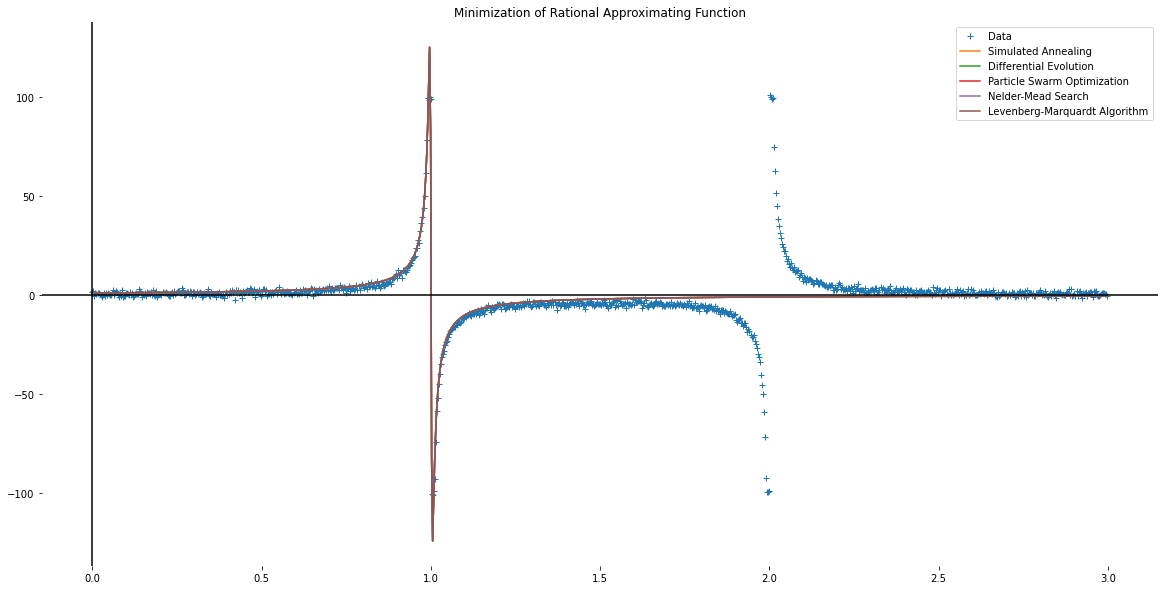

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [rational_approximant(x, a_nm, b_nm, c_nm, d_nm) for x in x_k]
plt.plot(x_k, y, label='Simulated Annealing')

y = [rational_approximant(x, a_nm, b_nm, c_nm, d_nm) for x in x_k]
plt.plot(x_k, y, label='Differential Evolution')

y = [rational_approximant(x, a_nm, b_nm, c_nm, d_nm) for x in x_k]
plt.plot(x_k, y, label='Particle Swarm Optimization')

y = [rational_approximant(x, a_nm, b_nm, c_nm, d_nm) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

y = [rational_approximant(x, a_lm, b_lm, c_lm, d_lm) for x in x_k]
plt.plot(x_k, y, label='Levenberg-Marquardt Algorithm')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()

plt.show()

<a name='003'></a>

<h2>Appendix to Section II</h2>

USCAP Dataset

Source: https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

In [3]:
df = pd.read_csv('data.csv')
df

,name,state,x,y
0,Montgomery,Alabama,-5961.513053,2236.041996
1,Juneau,Alaska,-9287.821355,4028.410983
2,Phoenix,Arizona,-7743.816805,2311.143387
3,Little Rock,Arkansas,-6379.680295,2400.107649
4,Sacramento,California,-8392.976246,2664.025176
5,Denver,Colorado,-7253.950857,2745.804159
6,Hartford,Connecticut,-5021.665662,2885.918649
7,Dover,Delaware,-5218.571379,2705.918983
8,Tallahassee,Florida,-5822.883103,2104.087378
9,Atlanta,Georgia,-5830.983188,2332.669658


In [4]:
def read_coordinates(df):
    coordinates = []
    for index in range(len(df)):
        coordinate = [df.loc[index, 'x'], df.loc[index, 'y']]
        coordinates.append(coordinate)
    return coordinates

def plot(path, points, df, title):
    plt.figure(figsize=(20, 10))
    ax = plt.gca()
    
    x = []
    y = []
    for index, data in enumerate(path[0]):
        x.append(points[data][0])
        y.append(points[data][1])
    
    for index in range(len(df)):
        ax.text(df.loc[index, 'x']+10, df.loc[index, 'y']+10, str(df.loc[index, 'name']), size=10)
    
    ax.scatter(x, y, s=50, c='black')
    plt.text((x[-1]+x[0])/2, (y[-1]+y[0])/2, str(1), size=10)
    plt.arrow(x[-1], y[-1], (x[0]-x[-1]), (y[0]-y[-1]),
              head_width=50, color ='r', length_includes_head=True)
    
    for i in range(0, len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1]-x[i]), (y[i+1]-y[i]),
                  head_width=50, color='r', length_includes_head=True)
        plt.text((x[i]+x[i+1])/2, (y[i]+y[i+1])/2, str(i+2), size=10)
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(title)
    
    plt.grid()
    plt.show()

Simulated Annealing Method

Source: http://www.blog.pyoung.net/2013/07/26/visualizing-the-traveling-salesman-problem-using-matplotlib-in-python

In [5]:
class Annealing(object):
    def __init__(self, coordinates, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1, path=df):
        self.coordinates = coordinates
        self.N = len(coordinates)
        self.T = np.sqrt(self.N) if T == -1 else T
        self.T_save = self.T
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-6 if stopping_T == -1 else stopping_T
        self.stopping_iter = 1000000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1
        self.path = path
        
        self.nodes = [i for i in range(self.N)]
        
        self.best_solution = None
        self.best_fitness = float('Inf')
        self.fitness_list = []
    
    def initial_solution(self):
        cur_node = random.choice(self.nodes)
        solution = [cur_node]
        
        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node
        
        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit
    
    def dist(self, node_0, node_1):
        coord_0, coord_1 = self.coordinates[node_0], self.coordinates[node_1]
        return np.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)
    
    def fitness(self, solution):
        cur_fit = 0
        for i in range(self.N):
            cur_fit = cur_fit + self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit
    
    def p_accept(self, candidate_fitness):
        return np.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)
    
    def accept(self, candidate):
        candidate_fitness = self.fitness(candidate)
        
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate
    
    def anneal(self):
        self.cur_solution, self.cur_fitness = self.initial_solution()
        
        print('Initialized solution:', self.best_fitness)
        plot([self.cur_solution], self.coordinates, self.path, 'Initialized Solution')
        
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T = self.T * self.alpha
            self.iteration = self.iteration + 1
            
            self.fitness_list.append(self.cur_fitness)
        
        print('Best obtained solution:', self.best_fitness)
        plot([self.best_solution], self.coordinates, self.path, 'Best Obtained Solution')

Initialized solution: 22673.775788622937


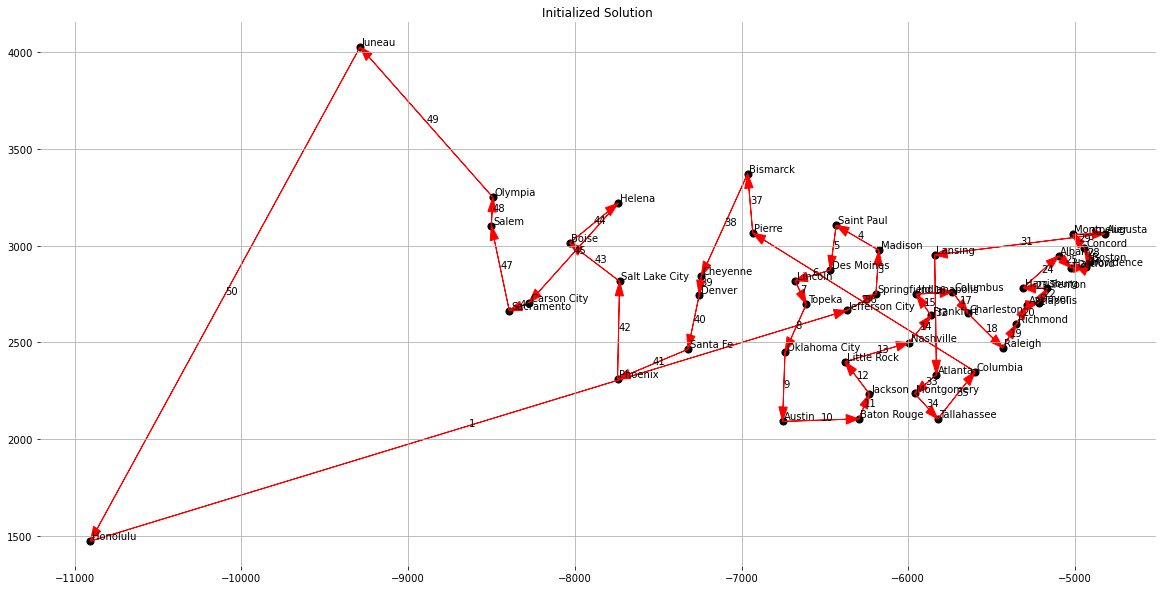

Best obtained solution: 19650.417770832508


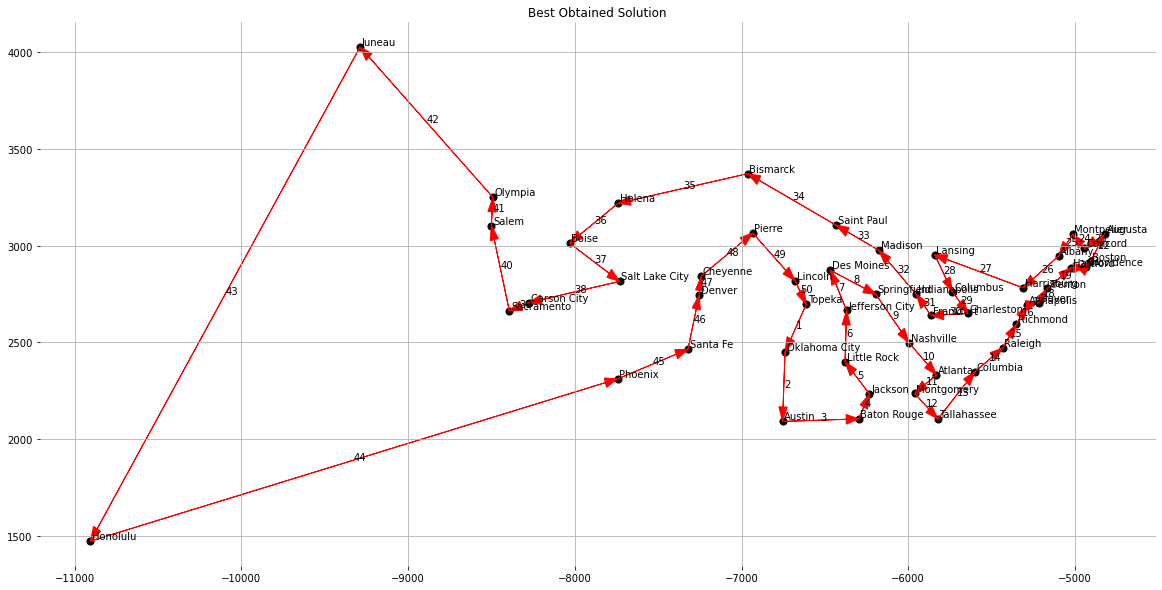

In [6]:
coordinates = read_coordinates(df)
simulated_annealing = Annealing(coordinates=coordinates, stopping_iter=1000000, path=df)
simulated_annealing.anneal()